In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
ltc = pd.read_csv('data_with_blockchain_ltc.csv')

In [4]:
ltc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1824 non-null   int64  
 1   date           1824 non-null   object 
 2   hashrate       1824 non-null   float64
 3   difficulty     1824 non-null   float64
 4   Open           1824 non-null   float64
 5   High           1824 non-null   float64
 6   Low            1824 non-null   float64
 7   Close          1824 non-null   float64
 8   close_nextday  1824 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 128.4+ KB


In [5]:
ltc.head()

,Unnamed: 0,date,hashrate,difficulty,Open,High,Low,Close,close_nextday
0,0,2018-05-29,310.189298,1.092329e+07,110.66,122.71,109.41,119.28,117.18
1,1,2018-05-30,277.778313,1.092329e+07,119.52,122.73,114.69,117.18,118.25
2,2,2018-05-31,302.629070,1.084916e+07,117.18,121.01,116.04,118.25,120.19
3,3,2018-06-01,290.449101,1.045068e+07,118.25,120.40,116.62,120.19,123.44
4,4,2018-06-02,284.298494,1.045068e+07,120.19,124.50,118.66,123.44,125.33


In [6]:
ltc.drop(["Unnamed: 0"],axis=1,inplace=True)
ltc

,date,hashrate,difficulty,Open,High,Low,Close,close_nextday
0,2018-05-29,310.189298,1.092329e+07,110.66,122.71,109.41,119.28,117.18
1,2018-05-30,277.778313,1.092329e+07,119.52,122.73,114.69,117.18,118.25
2,2018-05-31,302.629070,1.084916e+07,117.18,121.01,116.04,118.25,120.19
3,2018-06-01,290.449101,1.045068e+07,118.25,120.40,116.62,120.19,123.44
4,2018-06-02,284.298494,1.045068e+07,120.19,124.50,118.66,123.44,125.33
...,...,...,...,...,...,...,...,...
1819,2023-05-22,710.643539,2.434342e+07,92.17,92.79,89.81,90.83,91.70
1820,2023-05-23,701.787443,2.434342e+07,90.83,93.11,90.38,91.70,85.82
1821,2023-05-24,678.559295,2.434874e+07,91.70,91.89,84.33,85.82,86.57
1822,2023-05-25,705.524436,2.464130e+07,85.83,86.79,82.54,86.57,87.08


In [8]:
target = ltc['close_nextday'].values

In [9]:
ltc.set_index('date', inplace=True)
ltc.head()

,hashrate,difficulty,Open,High,Low,Close,close_nextday
date,,,,,,,
2018-05-29,310.189298,1.092329e+07,110.66,122.71,109.41,119.28,117.18
2018-05-30,277.778313,1.092329e+07,119.52,122.73,114.69,117.18,118.25
2018-05-31,302.629070,1.084916e+07,117.18,121.01,116.04,118.25,120.19
2018-06-01,290.449101,1.045068e+07,118.25,120.40,116.62,120.19,123.44
2018-06-02,284.298494,1.045068e+07,120.19,124.50,118.66,123.44,125.33


In [10]:
ltc.tail()

,hashrate,difficulty,Open,High,Low,Close,close_nextday
date,,,,,,,
2023-05-22,710.643539,2.434342e+07,92.17,92.79,89.81,90.83,91.70
2023-05-23,701.787443,2.434342e+07,90.83,93.11,90.38,91.70,85.82
2023-05-24,678.559295,2.434874e+07,91.70,91.89,84.33,85.82,86.57
2023-05-25,705.524436,2.464130e+07,85.83,86.79,82.54,86.57,87.08
2023-05-26,716.004575,2.464130e+07,86.57,88.20,86.05,87.08,88.55


In [11]:
ltc[0:4]

,hashrate,difficulty,Open,High,Low,Close,close_nextday
date,,,,,,,
2018-05-29,310.189298,1.092329e+07,110.66,122.71,109.41,119.28,117.18
2018-05-30,277.778313,1.092329e+07,119.52,122.73,114.69,117.18,118.25
2018-05-31,302.629070,1.084916e+07,117.18,121.01,116.04,118.25,120.19
2018-06-01,290.449101,1.045068e+07,118.25,120.40,116.62,120.19,123.44


In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
ltc_scaled = scaler.fit_transform(ltc)
ltc_scaled

array([[0.39013221, 0.42675052, 0.24019084, ..., 0.26989587, 0.26376398,
        0.25800614],
       [0.34936817, 0.42675052, 0.26448411, ..., 0.28625883, 0.25800614,
        0.2609399 ],
       [0.38062354, 0.42385419, 0.25806805, ..., 0.29044254, 0.2609399 ,
        0.26625905],
       ...,
       [0.85343962, 0.95125506, 0.18820433, ..., 0.19217181, 0.17202237,
        0.17407875],
       [0.8873543 , 0.96268489, 0.17210935, ..., 0.18662452, 0.17407875,
        0.17547708],
       [0.90053541, 0.96268489, 0.17413836, ..., 0.19750217, 0.17547708,
        0.17950757]])

In [15]:
ltc_scaled_df = pd.DataFrame(ltc_scaled, columns=ltc.columns,index=ltc.index)
ltc_scaled_df

,hashrate,difficulty,Open,High,Low,Close,close_nextday
date,,,,,,,
2018-05-29,0.390132,0.426751,0.240191,0.253894,0.269896,0.263764,0.258006
2018-05-30,0.349368,0.426751,0.264484,0.253945,0.286259,0.258006,0.260940
2018-05-31,0.380624,0.423854,0.258068,0.249532,0.290443,0.260940,0.266259
2018-06-01,0.365305,0.408286,0.261002,0.247967,0.292240,0.266259,0.275170
2018-06-02,0.357569,0.408286,0.266321,0.258487,0.298562,0.275170,0.280352
...,...,...,...,...,...,...,...
2023-05-22,0.893793,0.951047,0.189493,0.177123,0.209155,0.185759,0.188144
2023-05-23,0.882654,0.951047,0.185819,0.177944,0.210921,0.188144,0.172022
2023-05-24,0.853440,0.951255,0.188204,0.174813,0.192172,0.172022,0.174079


In [16]:
train_data, test_data = train_test_split(ltc_scaled_df, test_size=0.1, shuffle=False) 

In [18]:
def create_dataset(data, time_steps):
    print(f"Input data type: {type(data)}")
    X, Y = [], []
    for i in range(len(data) - time_steps - 1):
        x = data[i:(i + time_steps), :6]
#       This means that for each sequence of time_steps length, the target value is the one that comes immediately after
#       that sequence.
        y = data[i + time_steps-1, 6] # Assuming the target variable close_nextday is the last column 
        print(f"i: {i}, x shape: {x.shape}, y: {y}")
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [20]:
time_steps = 1 # Adjust this value depending on the desired sequence length
X_train, Y_train = create_dataset(train_data.values, time_steps)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)
X_test, Y_test = create_dataset(test_data.values, time_steps)

Input data type: <class 'numpy.ndarray'>
i: 0, x shape: (1, 6), y: 0.2580061416977407
i: 1, x shape: (1, 6), y: 0.26093989910067994
i: 2, x shape: (1, 6), y: 0.2662590480368502
i: 3, x shape: (1, 6), y: 0.2751699934196095
i: 4, x shape: (1, 6), y: 0.2803520508883527
i: 5, x shape: (1, 6), y: 0.2651074797104628
i: 6, x shape: (1, 6), y: 0.27171528844044746
i: 7, x shape: (1, 6), y: 0.2701524457117789
i: 8, x shape: (1, 6), y: 0.269960517657381
i: 9, x shape: (1, 6), y: 0.2648607150690941
i: 10, x shape: (1, 6), y: 0.25860934415441983
i: 11, x shape: (1, 6), y: 0.2286685676683483
i: 12, x shape: (1, 6), y: 0.23064268479929806
i: 13, x shape: (1, 6), y: 0.21002412809826715
i: 14, x shape: (1, 6), y: 0.19272318490897128
i: 15, x shape: (1, 6), y: 0.21331432331651673
i: 16, x shape: (1, 6), y: 0.1985632814213643
i: 17, x shape: (1, 6), y: 0.20174380346567228
i: 18, x shape: (1, 6), y: 0.1970552752796666
i: 19, x shape: (1, 6), y: 0.20733713533669662
i: 20, x shape: (1, 6), y: 0.207254880456

In [21]:
X_train.shape

(1147, 1, 6)

In [22]:
X_val.shape

(492, 1, 6)

In [23]:
Y_train.shape

(1147,)

In [24]:
Y_test[0] #for the first sequence (0-5): the target is the 5th day's (of the sequence [4]) close_nextday price 

0.1463862689186225

In [25]:
test_data

,hashrate,difficulty,Open,High,Low,Close,close_nextday
date,,,,,,,
2022-11-25,0.681858,0.781241,0.152505,0.144048,0.157463,0.139888,0.146386
2022-11-26,0.691960,0.781241,0.139947,0.143407,0.159818,0.146386,0.142136
2022-11-27,0.702055,0.781241,0.146473,0.142560,0.160624,0.142136,0.139532
2022-11-28,0.718515,0.759078,0.142195,0.132348,0.149405,0.139532,0.144549
2022-11-29,0.693619,0.751724,0.139563,0.139122,0.158299,0.144549,0.153762
...,...,...,...,...,...,...,...
2023-05-22,0.893793,0.951047,0.189493,0.177123,0.209155,0.185759,0.188144
2023-05-23,0.882654,0.951047,0.185819,0.177944,0.210921,0.188144,0.172022
2023-05-24,0.853440,0.951255,0.188204,0.174813,0.192172,0.172022,0.174079


In [26]:
Y_train[0]

0.20717262557578414

In [27]:
train_data

,hashrate,difficulty,Open,High,Low,Close,close_nextday
date,,,,,,,
2018-05-29,0.390132,0.426751,0.240191,0.253894,0.269896,0.263764,0.258006
2018-05-30,0.349368,0.426751,0.264484,0.253945,0.286259,0.258006,0.260940
2018-05-31,0.380624,0.423854,0.258068,0.249532,0.290443,0.260940,0.266259
2018-06-01,0.365305,0.408286,0.261002,0.247967,0.292240,0.266259,0.275170
2018-06-02,0.357569,0.408286,0.266321,0.258487,0.298562,0.275170,0.280352
...,...,...,...,...,...,...,...
2022-11-20,0.662142,0.752461,0.112199,0.105458,0.117919,0.107041,0.104820
2022-11-21,0.705259,0.744988,0.107099,0.103020,0.114448,0.104820,0.130456
2022-11-22,0.714144,0.741665,0.104960,0.122033,0.120088,0.130456,0.153378


In [28]:
print(X_train.shape, Y_train.shape)

(1147, 1, 6) (1147,)


In [29]:
print(X_test.shape, Y_test.shape)

(181, 1, 6) (181,)


In [30]:
import kerastuner
#requires tensorflow of version > 2
import tensorflow as tf 
tf.__version__

C:\Users\Layan\AppData\Local\Temp\ipykernel_14572\523704410.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


'2.9.1'

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras_tuner.tuners import RandomSearch
import numpy as np
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=512, step=32), 
                   return_sequences=True, 
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=0.2))  # Add dropout regularization
    #model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(LSTM(units=hp.Int('units_3', min_value=32, max_value=512, step=32)))
    model.add(Dense(1)) 
    model.compile(loss=root_mean_squared_error, optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']))
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='train_lstm',
    project_name='lstm_tuning')

# Perform the hyperparameter search.
tuner.search(X_train, Y_train,
             epochs=20,
             validation_data=(X_val, Y_val))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('units_1')} and the optimal optimizer is {best_hps.get('optimizer')}")


INFO:tensorflow:Reloading Tuner from train_lstm\lstm_tuning\tuner0.json
INFO:tensorflow:Oracle triggered exit
The optimal number of units in the first densely-connected layer is 288 and the optimal optimizer is adam


In [32]:
# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Print the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 288)            339840    
                                                                 
 dropout (Dropout)           (None, 1, 288)            0         
                                                                 
 lstm_1 (LSTM)               (None, 416)               1173120   
                                                                 
 dense (Dense)               (None, 1)                 417       
                                                                 
Total params: 1,513,377
Trainable params: 1,513,377
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
18/18 [==============================] - 3s 47ms/step - loss: 0.1396 - val_loss: 0.0554
Epoch 2/50
18/18 [==============================] - 0s 13ms/step - loss: 0.0404 - val_loss: 0.0251
Epoch 3/50
18/18 [==============================] - 0s 13ms/step - loss: 0.0239 - val_loss: 0.0197
Epoch 4/50
18/18 [==============================] - 0s 13ms/step - loss: 0.0247 - val_loss: 0.0265
Epoch 5/50
18/18 [==============================] - 0s 14ms/step - loss: 0.0234 - val_loss: 0.0206
Epoch 6/50
18/18 [==============================] - 0s 14ms/step - loss: 0.0232 - val_loss: 0.0206
Epoch 7/50
18/18 [==============================] - 0s 13ms/step - loss: 0.0226 - val_loss: 0.0185
Epoch 8/50
18/18 [==============================] - 0s 13ms/step - loss: 0.0214 - val_loss: 0.0185
Epoch 9/50
18/18 [==============================] - 0s 14ms/step - loss: 0.0209 - val_loss: 0.0186
Epoch 10/50
18/18 [==============================] - 0s 14ms/step - loss: 0.0218 - val_loss: 0.0206
Epoch 11/

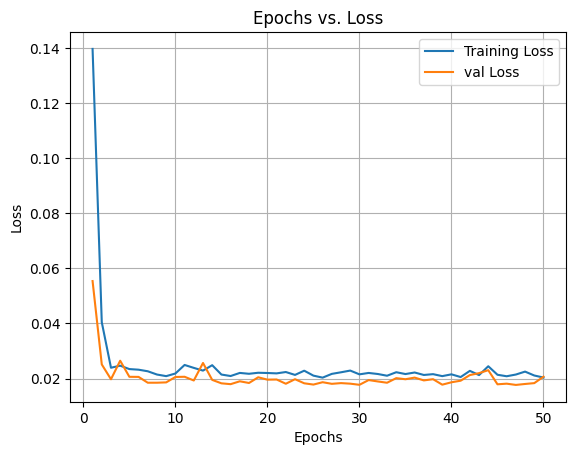

In [33]:
import matplotlib.pyplot as plt

# Model fitting code
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val),batch_size=64)

# Extracting loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting epochs vs. loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='val Loss')
plt.title('Epochs vs. Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
# Making predictions on the test data
predictions = model.predict(X_test)

6/6 [==============================] - 1s 4ms/step


In [35]:
type(predictions[0][0])

numpy.float32

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)  # or mse**(0.5) 
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.013177622535250155


In [38]:
# denormalized_value = (normalized_value * (max_value - min_value)) + min_value
denormalized_value =  (predictions[-1][0] * (ltc['close_nextday'].max() - ltc['close_nextday'].min())+ ltc['close_nextday'].min())
denormalized_value

82.87540784597397

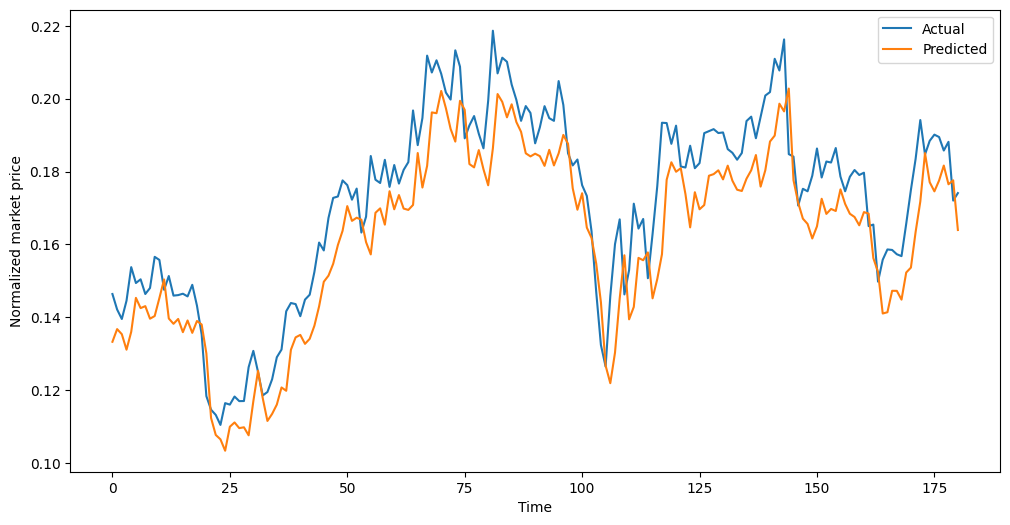

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized market price')
plt.legend()
plt.show()